# ***CP-05*** - Regressão em Dados de Data Breach

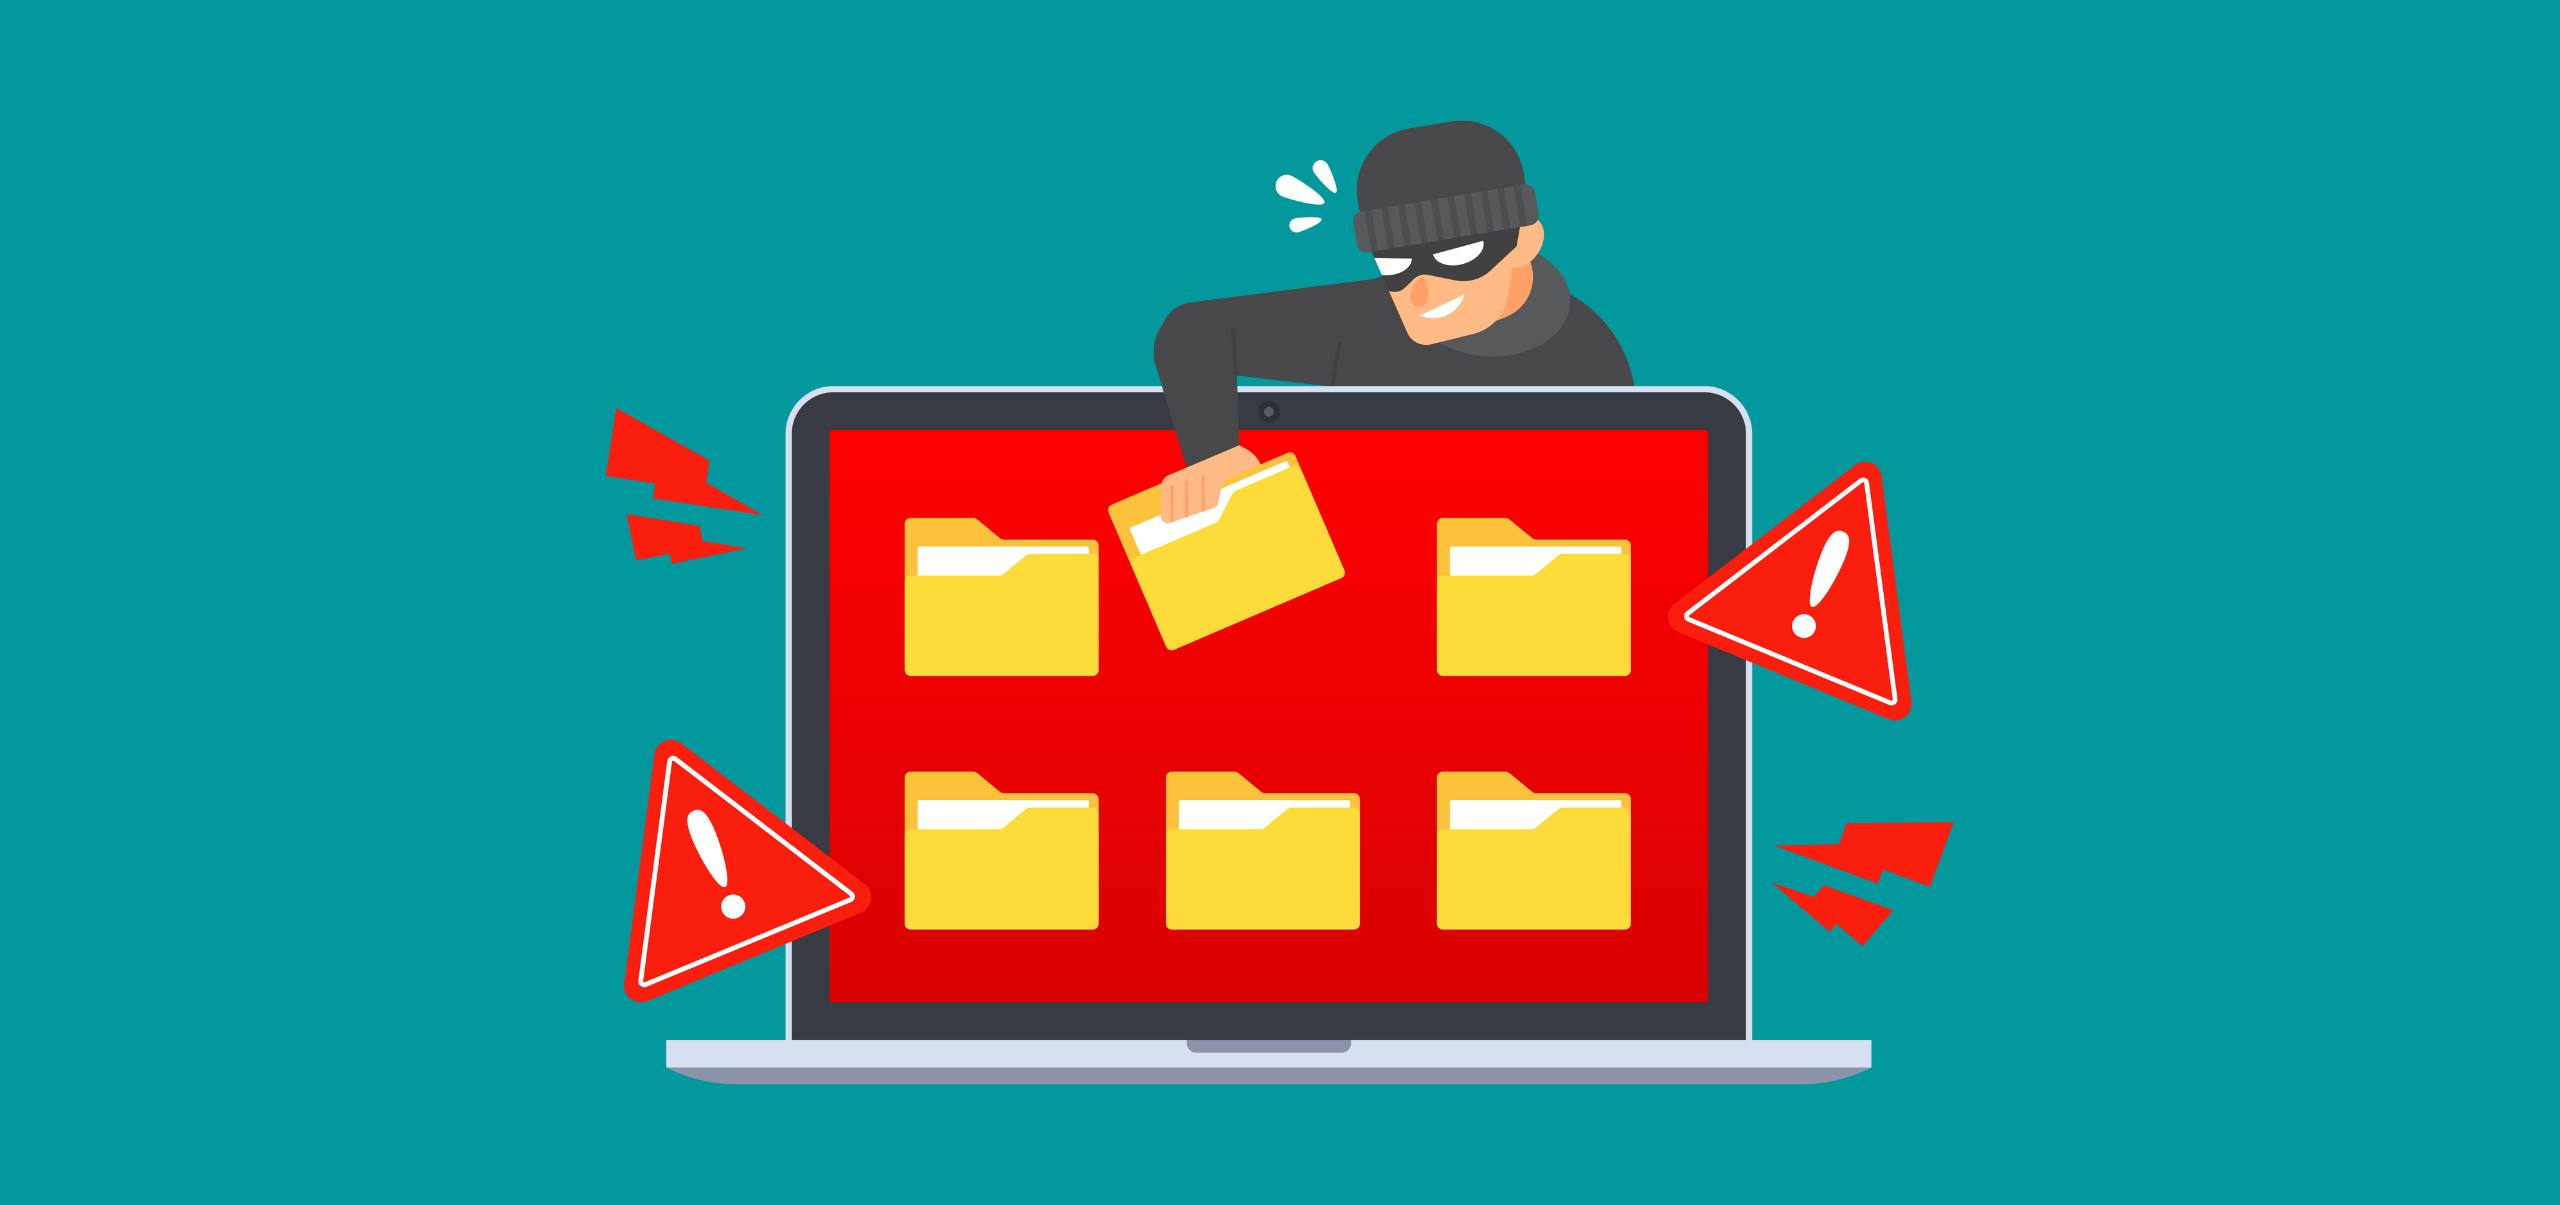

## **RMs:**


- **RM 98305**: Guilherme Cavalheiro Siqueira
- **RM 98491**: Rafael Nunes Mendes
- **RM 99225**: Eduardo do Nascimento Silva
- **RM 98243**: João Eduardo Busar Pena

## Importação e Visualização dos Dados

Nesta etapa, vamos importar a base de dados utilizando a biblioteca **pandas**. Em seguida, iremos visualizar as primeiras linhas do conjunto de dados e, para garantir a consistência dos dados antes da análise, removeremos os valores faltantes.


In [ ]:
import pandas as pd

# Carregar os dados
file_path = '/content/breach_report.csv'
df = pd.read_csv(file_path)

# Visualizar as primeiras informações sobre os dados
df.info()
df.head()

# Imputar valores faltantes em 'Individuals Affected' com a mediana
df['Individuals Affected'] = df['Individuals Affected'].fillna(df['Individuals Affected'].median())

# Imputar valores faltantes em colunas categóricas com o valor mais frequente (moda)
df['Covered Entity Type'] = df['Covered Entity Type'].fillna(df['Covered Entity Type'].mode()[0])
df['Type of Breach'] = df['Type of Breach'].fillna(df['Type of Breach'].mode()[0])
df['Location of Breached Information'] = df['Location of Breached Information'].fillna(df['Location of Breached Information'].mode()[0])
df['Business Associate Present'] = df['Business Associate Present'].fillna(df['Business Associate Present'].mode()[0])

# Conferir se todos os valores faltantes foram preenchidos
df_cleaned = df
df_cleaned.info()  # Verificar se todos os valores faltantes foram preenchidos
df_cleaned.head()  # Visualizar os dados após o tratamento


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             1654 non-null   int64  
 1   Name of Covered Entity            1654 non-null   object 
 2   State                             1645 non-null   object 
 3   Covered Entity Type               1613 non-null   object 
 4   Individuals Affected              1632 non-null   float64
 5   Breach Submission Date            1654 non-null   object 
 6   Type of Breach                    1640 non-null   object 
 7   Location of Breached Information  1643 non-null   object 
 8   Business Associate Present        1654 non-null   object 
 9   Web Description                   1257 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 129.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1654 entries, 0 to 1653

,index,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present,Web Description
0,0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/09,Theft,Paper/Films,No,A binder containing the protected health infor...
1,1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/09,Theft,Network Server,No,Five desktop computers containing unencrypted ...
2,2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/09,Theft,"Other, Other Portable Electronic Device",No,\N
3,3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/09,Loss,Laptop,No,A laptop was lost by an employee while in tran...
4,4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/09,Theft,Desktop Computer,No,A shared Computer that was used for backup was...


## Visualização Gráfica dos Dados

Nesta etapa, criaremos dois gráficos para visualizar a **distribuição dos dados** e identificar **padrões** significativos. Esses gráficos vão nos ajudar a compreender melhor os tipos de **vazamentos de dados** e os **locais mais afetados**, proporcionando insights valiosos para a análise e compreensão dos incidentes.


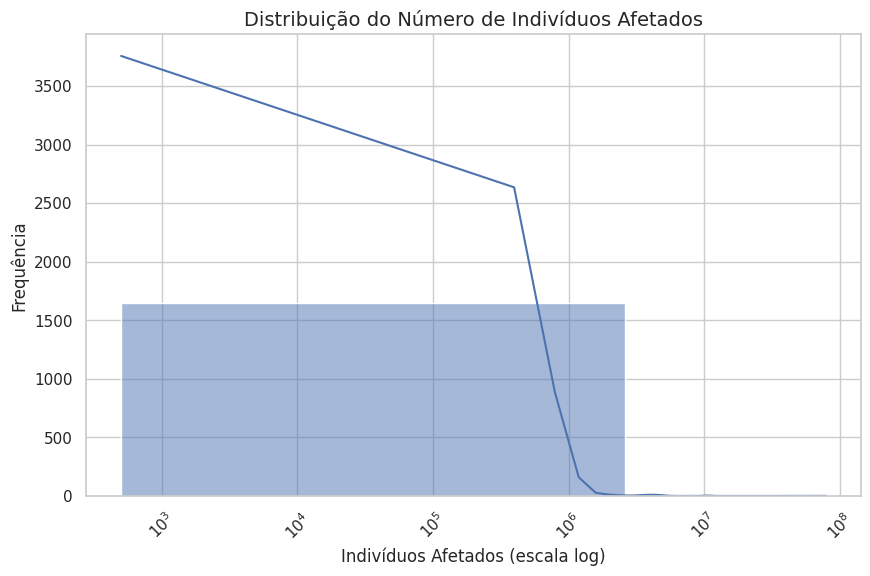

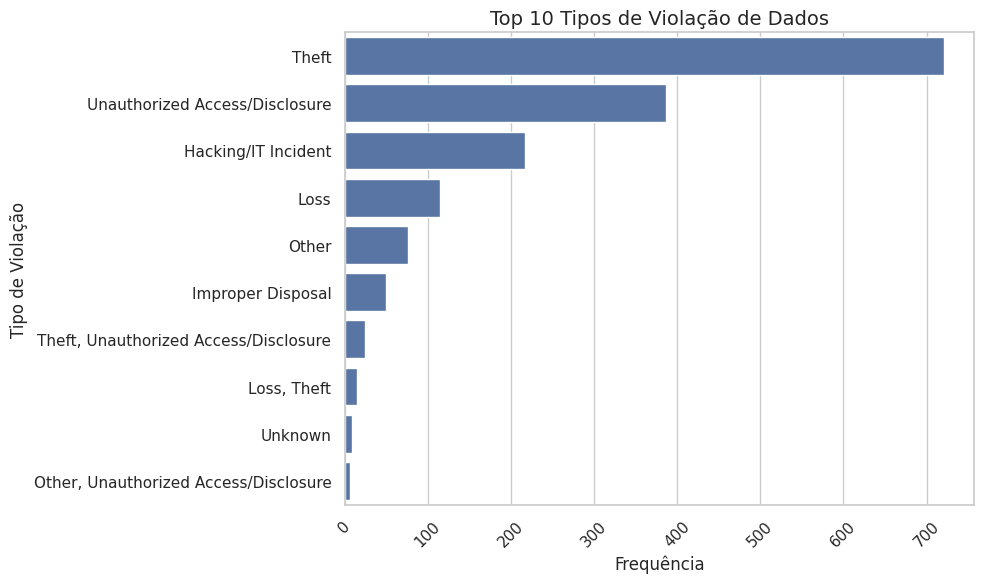

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajustes gerais de estilo
sns.set(style="whitegrid")

# Gráfico 1: Distribuição de 'Individuals Affected' com escala logarítmica
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Individuals Affected'], bins=30, kde=True)
plt.title('Distribuição do Número de Indivíduos Afetados', fontsize=14)
plt.xlabel('Indivíduos Afetados (escala log)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xscale('log')  # Aplica escala logarítmica no eixo X
plt.xticks(rotation=45)
plt.show()

# Gráfico 2: Limitar o número de tipos de violação de dados
top_breaches = df_cleaned['Type of Breach'].value_counts().nlargest(10).index  # Top 10 categorias
plt.figure(figsize=(10, 6))
sns.countplot(y='Type of Breach', data=df_cleaned[df_cleaned['Type of Breach'].isin(top_breaches)],
              order=top_breaches)
plt.title('Top 10 Tipos de Violação de Dados', fontsize=14)
plt.xlabel('Frequência', fontsize=12)
plt.ylabel('Tipo de Violação', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Análise e Remoção de 'Web Description'

Nesta etapa, **visualizaremos alguns exemplos** da coluna **'Web Description'** para entender como os casos de **vazamento de dados** ocorreram. Essa análise nos proporcionará um contexto sobre os incidentes registrados.

Em seguida, **removeremos essa coluna**, pois não é necessária para o modelo preditivo que estamos desenvolvendo, garantindo que nossos dados permaneçam **otimizados** para análise.


In [ ]:

# Visualizar alguns exemplos de 'Web Description'
df_cleaned['Web Description'].head(10)

# Remover a coluna 'Web Description'
df_cleaned = df_cleaned.drop('Web Description', axis=1)

# Conferir o DataFrame após a remoção
df_cleaned.head()


,index,Name of Covered Entity,State,Covered Entity Type,Individuals Affected,Breach Submission Date,Type of Breach,Location of Breached Information,Business Associate Present
0,0,Brooke Army Medical Center,TX,Healthcare Provider,1000.0,10/21/09,Theft,Paper/Films,No
1,1,"Mid America Kidney Stone Association, LLC",MO,Healthcare Provider,1000.0,10/28/09,Theft,Network Server,No
2,2,Alaska Department of Health and Social Services,AK,Healthcare Provider,501.0,10/30/09,Theft,"Other, Other Portable Electronic Device",No
3,3,Health Services for Children with Special Need...,DC,Health Plan,3800.0,11/17/09,Loss,Laptop,No
4,4,"Mark D. Lurie, MD",CA,Healthcare Provider,5166.0,11/20/09,Theft,Desktop Computer,No


## Pré-processamento de Colunas Categóricas

Nesta etapa, vamos **aplicar a função `get_dummies`** para converter as colunas **categóricas** em variáveis **numéricas**. Essa conversão é essencial para que o modelo consiga **processar os dados corretamente** e realizar as previsões necessárias.

Ao transformar as variáveis categóricas em variáveis numéricas, garantimos que o modelo interprete os dados de forma adequada, melhorando a **eficiência** e a **precisão** da análise.


In [ ]:

# Aplicar get_dummies nas colunas categóricas
categorical_columns = ['Covered Entity Type', 'Type of Breach', 'Location of Breached Information', 'Business Associate Present']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Conferir o resultado após a transformação
df_cleaned.head()


,index,Name of Covered Entity,State,Individuals Affected,Breach Submission Date,Covered Entity Type_Health Plan,Covered Entity Type_Healthcare Clearing House,Covered Entity Type_Healthcare Provider,"Type of Breach_Hacking/IT Incident, Other","Type of Breach_Hacking/IT Incident, Other, Unauthorized Access/Disclosure",...,"Location of Breached Information_Laptop, Paper/Films",Location of Breached Information_Network Server,"Location of Breached Information_Network Server, Other",Location of Breached Information_Other,Location of Breached Information_Other Portable Electronic Device,"Location of Breached Information_Other Portable Electronic Device, Paper/Films","Location of Breached Information_Other, Other Portable Electronic Device","Location of Breached Information_Other, Paper/Films",Location of Breached Information_Paper/Films,Business Associate Present_Yes
0,0,Brooke Army Medical Center,TX,1000.0,10/21/09,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,1,"Mid America Kidney Stone Association, LLC",MO,1000.0,10/28/09,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
2,2,Alaska Department of Health and Social Services,AK,501.0,10/30/09,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,3,Health Services for Children with Special Need...,DC,3800.0,11/17/09,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,4,"Mark D. Lurie, MD",CA,5166.0,11/20/09,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


## Divisão e Normalização dos Dados

Nesta etapa, vamos **dividir o conjunto de dados** em conjuntos de **treino** e **teste**. Em seguida, aplicaremos a **normalização** utilizando o `MinMaxScaler`, o que garantirá que todas as variáveis estejam na mesma **escala**.

A normalização é uma prática crucial em modelagem preditiva, pois ajuda a **melhorar a convergência** do modelo e a **reduzir** o impacto de características com escalas diferentes, permitindo que o modelo aprenda de forma mais eficiente e eficaz.


In [ ]:
# Verificar quais colunas ainda estão presentes no DataFrame
print(df_cleaned.columns)

# Remover as colunas de texto restantes, apenas se elas ainda existirem
columns_to_drop = ['Name of Covered Entity', 'State', 'Breach Submission Date']
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns])

# Verificar se as colunas categóricas já foram convertidas corretamente
print(df_cleaned.columns)

# Garantir que não haja mais colunas com strings
print(df_cleaned.select_dtypes(include=['object']).head())

# Separar X (variáveis preditoras) e y (variável alvo)
X = df_cleaned.drop(columns=['Individuals Affected'])
y = df_cleaned['Individuals Affected']

# Dividir os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar normalização
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verificar se a normalização foi aplicada corretamente
print(X_train_scaled[:5])


Index(['index', 'Individuals Affected', 'Covered Entity Type_Health Plan',
       'Covered Entity Type_Healthcare Clearing House',
       'Covered Entity Type_Healthcare Provider',
       'Type of Breach_Hacking/IT Incident, Other',
       'Type of Breach_Hacking/IT Incident, Other, Unauthorized Access/Disclosure',
       'Type of Breach_Hacking/IT Incident, Theft',
       'Type of Breach_Hacking/IT Incident, Theft, Unauthorized Access/Disclosure',
       'Type of Breach_Hacking/IT Incident, Unauthorized Access/Disclosure',
       'Type of Breach_Improper Disposal',
       'Type of Breach_Improper Disposal, Loss',
       'Type of Breach_Improper Disposal, Loss, Theft',
       'Type of Breach_Improper Disposal, Unauthorized Access/Disclosure',
       'Type of Breach_Loss', 'Type of Breach_Loss, Other',
       'Type of Breach_Loss, Other, Theft', 'Type of Breach_Loss, Theft',
       'Type of Breach_Loss, Unauthorized Access/Disclosure',
       'Type of Breach_Loss, Unauthorized Access/Di

## Treinamento e Comparação de Modelos de Regressão

Nesta etapa, vamos **treinar diferentes modelos de regressão** para prever o número de indivíduos afetados por vazamentos de dados. Começaremos com a **Regressão Linear** como nosso modelo de referência, seguido pela aplicação de **Random Forest** e **Gradient Boosting**.

O objetivo é avaliar o desempenho de cada modelo e identificar qual deles apresenta o melhor desempenho em termos de **erro médio quadrático** (RMSE). Isso nos ajudará a escolher a melhor abordagem para a análise preditiva.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Função para calcular o RMSE
def calcular_rmse(y_true, y_pred):
    return (mean_squared_error(y_true, y_pred)) ** 0.5  # Calcular RMSE manualmente

# Função para avaliar os modelos
def avaliar_modelo(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = calcular_rmse(y_test, y_pred)  # Chamar a função de RMSE
    print(f'{model.__class__.__name__} RMSE: {rmse}')
    return rmse

# Carregar os dados
file_path = 'breach_report.csv'
df = pd.read_csv(file_path)

# Remover valores faltantes
df_cleaned = df.dropna()

# Remover colunas textuais
columns_to_drop = ['Name of Covered Entity', 'State', 'Breach Submission Date']
df_cleaned = df_cleaned.drop(columns=[col for col in columns_to_drop if col in df_cleaned.columns])

# Aplicar get_dummies nas colunas categóricas
categorical_columns = ['Covered Entity Type', 'Type of Breach', 'Location of Breached Information', 'Business Associate Present']
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_columns, drop_first=True)

# Remover outliers acima do 95º percentil
upper_limit = df_cleaned['Individuals Affected'].quantile(0.95)
df_no_outliers = df_cleaned[df_cleaned['Individuals Affected'] <= upper_limit]

# Separar X (variáveis preditoras) e y (variável alvo)
X_no_outliers = df_no_outliers.drop(columns=['Individuals Affected'])
y_no_outliers = df_no_outliers['Individuals Affected']

# Dividir os dados em treino e teste
X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_no_outliers, y_no_outliers, test_size=0.2, random_state=42
)

# Garantir que X_train e X_test contenham apenas dados numéricos
X_train_no_outliers = X_train_no_outliers.select_dtypes(include=['float64', 'int64'])
X_test_no_outliers = X_test_no_outliers.select_dtypes(include=['float64', 'int64'])

# Aplicar normalização
scaler = MinMaxScaler()
X_train_scaled_no_outliers = scaler.fit_transform(X_train_no_outliers)
X_test_scaled_no_outliers = scaler.transform(X_test_no_outliers)

# Treinar e avaliar os modelos
# Regressão Linear
linear_reg = LinearRegression()
avaliar_modelo(linear_reg, X_train_scaled_no_outliers, X_test_scaled_no_outliers, y_train_no_outliers, y_test_no_outliers)

# Random Forest
random_forest = RandomForestRegressor(random_state=42)
avaliar_modelo(random_forest, X_train_scaled_no_outliers, X_test_scaled_no_outliers, y_train_no_outliers, y_test_no_outliers)

# Gradient Boosting
gradient_boosting = GradientBoostingRegressor(random_state=42)
avaliar_modelo(gradient_boosting, X_train_scaled_no_outliers, X_test_scaled_no_outliers, y_train_no_outliers, y_test_no_outliers)

# Modelos Ridge e Lasso
ridge = Ridge(random_state=42)
avaliar_modelo(ridge, X_train_scaled_no_outliers, X_test_scaled_no_outliers, y_train_no_outliers, y_test_no_outliers)

lasso = Lasso(random_state=42)
avaliar_modelo(lasso, X_train_scaled_no_outliers, X_test_scaled_no_outliers, y_train_no_outliers, y_test_no_outliers)

# Estatísticas Descritivas
print("Estatísticas Descritivas de 'Individuals Affected':")
print(df_cleaned['Individuals Affected'].describe())


LinearRegression RMSE: 7073.450772853656
RandomForestRegressor RMSE: 8651.738441718948
GradientBoostingRegressor RMSE: 7346.658462329152
Ridge RMSE: 7073.231338503425
Lasso RMSE: 7073.144650661685
Estatísticas Descritivas de 'Individuals Affected':
count    1.210000e+03
mean     2.952902e+04
std      2.219535e+05
min      5.000000e+02
25%      9.602500e+02
50%      2.200000e+03
75%      6.992750e+03
max      4.900000e+06
Name: Individuals Affected, dtype: float64


## Análise das Estatísticas Descritivas e Conclusão

Nesta etapa, vamos **comparar o RMSE** obtido na modelagem preditiva com as **estatísticas descritivas** da variável **'Individuals Affected'**. Essa comparação nos permitirá avaliar se o erro cometido pelos modelos é **aceitável** em relação à variabilidade e à distribuição dos dados.

Ao analisar essas métricas, poderemos tirar conclusões sobre a eficácia dos modelos utilizados e determinar se ajustes adicionais são necessários para melhorar a precisão das previsões.


count     1065.000000
mean      3241.173709
std       3406.576650
min        500.000000
25%        864.000000
50%       1801.000000
75%       4204.000000
max      15677.000000
Name: Individuals Affected, dtype: object


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


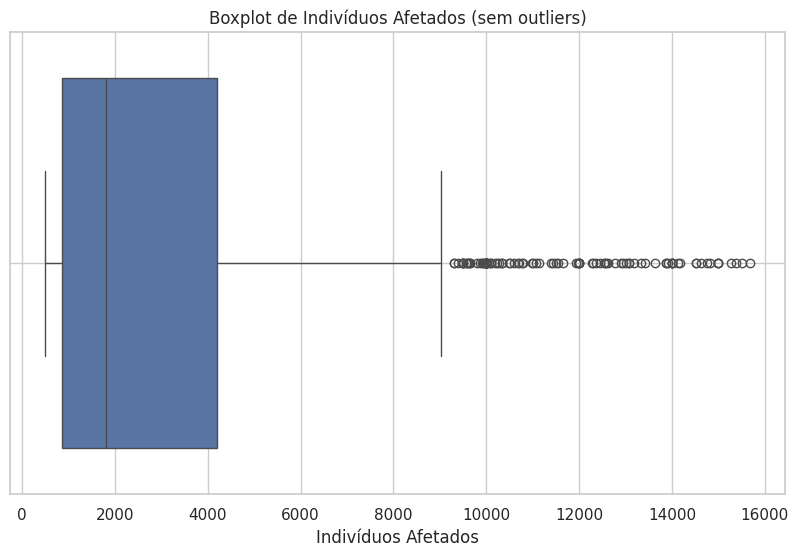

In [ ]:
# Garantir que 'Individuals Affected' está no formato numérico
df_cleaned['Individuals Affected'] = pd.to_numeric(df_cleaned['Individuals Affected'], errors='coerce')

# Remover outliers usando o método IQR
Q1 = df_cleaned['Individuals Affected'].quantile(0.25)
Q3 = df_cleaned['Individuals Affected'].quantile(0.75)
IQR = Q3 - Q1

# Definindo limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remover outliers
df_cleaned_no_outliers = df_cleaned[(df_cleaned['Individuals Affected'] >= lower_bound) &
                                     (df_cleaned['Individuals Affected'] <= upper_bound)]

# Estatísticas descritivas de 'Individuals Affected'
stats = df_cleaned_no_outliers['Individuals Affected'].describe().apply(lambda x: format(x, 'f'))
print(stats)

# Visualizar o boxplot de 'Individuals Affected' sem outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned_no_outliers['Individuals Affected'])
plt.title('Boxplot de Indivíduos Afetados (sem outliers)')
plt.xlabel('Indivíduos Afetados')
plt.grid(True)
plt.show()



## Conclusão

Com base nas análises realizadas, verificamos que os **modelos de regressão** apresentam **diferentes desempenhos** em relação ao **RMSE** (Raiz do Erro Quadrático Médio).

Ao **comparar** os resultados obtidos com as **estatísticas descritivas** da variável **'Individuals Affected'**, podemos determinar se o erro é **aceitável** para este conjunto de dados.

Essa análise é crucial, pois nos permite:
- Avaliar a **eficácia** dos modelos utilizados.
- Identificar áreas para **ajuste** e **melhoria** nas previsões.
- Compreender melhor as **dinâmicas** dos vazamentos de dados, ajudando na formulação de estratégias de mitigação mais eficazes.

Em suma, a **modelagem preditiva** se mostra uma ferramenta valiosa para entender e responder a incidentes de segurança de dados.

